In [1]:
import numpy as np
import pandas as pd
import MeCab
import re
import networkx as nx
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
data1=pd.read_excel("data/se/preprocessing_2015_cafe_ssal.xlsx")
data2=pd.read_excel("data/se/naver_cafe_ssal_contents_2019_Ï†ÑÏ≤òÎ¶¨ÏôÑ.xlsx")
data3=pd.read_excel("data/se/2020cafere.xlsx")

In [3]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9653 non-null   int64 
 1   title       9653 non-null   object
 2   nickname    9653 non-null   object
 3   date        9653 non-null   object
 4   content     9607 non-null   object
 5   comments    8912 non-null   object
dtypes: int64(1), object(5)
memory usage: 452.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 6 columns):


In [4]:
d1=pd.concat([data1,data2])
d1=d1[["date","content"]]
d1

date                                            content
0     2015.01.27  ÏÑ∏Ï¢ÖÏãúÎ°ú Ïò¨Ìï¥ 1Ïõî 10Ïùº Ïù¥ÏÇ¨ÌñàÏäµÎãàÎã§.Ïñ¥Ï†ú ÏåÄÏù¥ Îòë Îñ®Ïñ¥Ï°åÎäîÎç∞ ÎßàÏπ® ÍπåÌéòÏóê ÏåÄÍ≥µÍµ¨...
1     2015.01.04  Ï†ÄÌù¨ ÌÅ∞ÏïÑÎ≤ÑÏßÄÍªòÏÑú ÏåÄÎèÑÎß§Î•º ÌïòÏÑ∏Ïöî^^Îπ®Í∞ÑÏåÄ Ïù¥ÏòàÏöî.Ï†ÄÎèÑ ÏûëÎÖÅÎ∂ÄÌÑ∞ Í≥ÑÏÜç Î®πÍ≥†ÏûàÎäîÎç∞Ïöî^...
2     2015.01.13                                Ï†úÍ∞Ä Î≥ÄÎπÑÍ∞Ä Ïã¨Ìï¥ÏÑú ÌòÑÎØ∏ÏåÄ100%Î•º
3     2015.01.12  Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ÏöîÏ¶ò Í≥†ÎØº...
4     2015.01.11  Ïã¨Ïã¨Ìïú ÏùºÏöîÏùº Ïò§ÌõÑ.ÎãπÍ∑ºÏåÄÎ®∏ÌïÄ ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏñ¥Ïöî~ÎãπÍ∑ºÏù¥Îûë Ïö∞Ïú†Îäî ÌúòÎ¶¨Î¶≠ Í∞àÏïÑÏ£ºÍ≥†Î∞ÄÍ∞ÄÎ£®...
...          ...                                                ...
9549  2019.12.17                     ÏåÄÍ≥ºÏûê ÎÉ†ÎÉ† ÎßõÏûàÍ≤å Î®πÏúºÎ©∞ Ïó¥Ïã¨Ìûà Ï¶êÍ≤ÅÍ≤å Í≥µÎ∂ÄÌï¥Î¥êÏöî~üíï
9550  2019.12.13           Ï†ÄÏö∏ÏùÄ Ï§ÄÎπÑÎ•º ÏïàÌñàÏñ¥ÏöîÎ∂ÑÏú†Ïä§ÌëºÏúºÎ°ú ÏåÄÍ∞ÄÎ£® Î™áÍ∑∏Îû® ÎÇòÏò¨ÍπåÏöî?Ï¥àÍ∏∞Ïù¥Ïú†ÏãùÏûÖÎãàÎã§
9551  2019.12.24  ¬† *Ïò§ÎäòÏùò ÏµúÏ†ÄÍ∞Ä Ï†ïÎ≥¥Î°ØÎç∞ Î∞±ÌôîÏ†ê ÎÇ©Ìíà 10kg ÏåÄÎì±Í∏â ÏÉÅÎëêÍ∞ú Íµ¨Îß§ Í∞úÎãπ 23.7...
9552  2019.12.15  ÏåÄÌäÄÎ∞• ÎëêÍ∞ú (Ïú†ÌÜµÍ∏∞Ìïú 2020.3.17)Ïñ¥Í∑∏ 130ÏÇ¨Ïù¥Ï¶à(ÏÇ¨Ïö©Í∞ê ÏûáÎÑ§Ïö©)Í≤ÄÏ†ï Ïö¥Îèô...
9553  2019.12.01  ÎßòÎßàÎ∞Ä ÏïàÏã¨Ïù¥Ïú†Ïãù Îã®Ìò∏Î∞ïÍ≥º ÏÜåÍ≥†Í∏∞ 5Í∞úÏÇ¨Í≥ºÏôÄ Í≥†Íµ¨Îßà Ìì®Î†à 4Í∞ú (20ÎÖÑ 5ÏõîÍπåÏßÄ)Ïöî...

[19207 rows x 2 columns]

In [5]:
d2=data3[["date","content"]]
d2

date                                            content
0       2020.07.06  #RICEBAKING#ÏåÄÍµ¨ÏõÄÍ≥ºÏûê‚Üí‚ÜêÏû•Ïó¨ÏßÑ, Ï±ÑÎØ∏Ìù¨ ÏßÄÏùåÍ≤ΩÌñ•ÎØ∏ÎîîÏñ¥Î©îÎßàÎ•∏ ÏåÄÎ≤†Ïù¥ÌÇπÍ≥ÑÏùòÎã®...
1       2020.07.28  Î®πÎçòÍ≤åÏûàÏñ¥ÏÑú ÏãùÌÉÅÎ∞ëÏóê Î≥¥Í¥ÄÎßåÌïòÎã§Í∞Ä Í∞úÎ¥âÌñáÎçîÎãàÎßå·Ü¢ÏåÄÏù¥ ÎààÏóê Î≥¥Ïù¥Í≤å Îî± Íµ¨Î∂ÑÎêòÏñ¥ÏûàÎäîÍ±∞ ...
2       2020.07.22  ¬†¬†¬†¬†¬† Ïñ¥Ï†ú ÏåÄÏù¥ Îòë Îñ®Ïñ¥Ï†∏ÏÑú ...ÌïúÏù∏ÎßàÌä∏ Í∞ÄÍ∏∞Îäî ÎÑàÎ¨¥ Î©ÄÍ≥† ÎèôÎÑ§ ÏàòÌçº Ïä§ÌÜ†Ïñ¥...
3       2020.07.22  Í∞ÄÏôÄÏßÄÏåÄ ÏåïÍπîÏù¥ ÏõêÎûò Ïù¥Î†áÍ∞úÎàÑÎ¶¨ÎÅºÎ¶¨ÌïúÍ∞ÄÏöî?ÏÇ¥Ïßù Ìë∏Î£®Îî©Í∏¥ÌûåÍ≤ÉÍ∞ôÍ∏∞ÎèÑÌïòÍ≥†.. ÏåÄÎÉÑÏÉàÎèÑ Ï´å...
4       2020.07.30  Ìï¥ÏõêÍ≥† ÏåÄÍæ∏Îü¨ÎØ∏ ÌïúÎëêÎã¨Ï†ÑÏóê Î∞õÏùÄÎìØÌï¥ÏöîÏñºÎßàÏ†Ñ ÎÇ®ÏùÄ ÏåÄÎã§Î®πÍ≥† 5ÌÇ§Î°úÏßúÎ¶¨ ÏåÄ ÎßõÎÇòÍ≤å ÏûòÎ®π...
...            ...                                                ...
10045  2020.08.07.  ÏπúÏ†ïÏóêÏÑú ÏßÄÎÇúÏ£ºÏóê ÏåÄÏùÑÍ∞ÄÏ†∏ÏôîÎäîÎç∞ \nÏ†ÄÌù¨Î®πÏùÑÍ±∞ÎπºÍ≥† 10ÌÇ§Î°úÏßúÎ¶¨ 2ÎßåÏõêÏóêÌåêÎß§Ìï©ÎãàÎã§\n...
10046  2020.08.20.  ÏÑ∏ÏÉÅÏóê Ïò§ÎåÄÏåÄ ÏÇ∞ÏßÄ Ïù¥Ï£ºÎêúÍ±∞Í∞ôÏùÄÎç∞..„Ö†\nÏßÄÌçºÎ∞±Î≥¥Í¥ÄÌñàÍ≥†Ïöî\n10ÌÇ§Î°ú Î∞òÎ∞òÌï¥ÏÑú ÌïòÎÇòÎäî...
10047  2020.08.16.  Ïù∏ÌÑ∞ÎÑ∑Í≤ÄÏÉâÌïòÎãà\n\n20Î∞∞ÎùºÌï¥ÏÑú\n\nÏåÄÍ∞ÄÎ£® 20Í∑∏ÎûåÏóê Î¨º400ÎÑ£Í≥† Ïù¥Ïú†Ïãù ÎèåÎ¶¨Îãà„Ö†...
10048  2020.08.18.   ÏùºÎ∞òÏåÄ 20kg, Ï∞πÏåÄ 20kg ÎØ∏Í∞úÎ¥â ÏÉÅÌÉúÏù∏Îç∞ Ï¢Ä Ïò§ÎûòÎêòÏñ¥ÏÑú Í∞ÄÏ∂ï ÏÇ¨Î£åÏö©ÏúºÎ°ú Ïì∞...
10049  2020.08.19.  [Ïã±Ïã±Ï±ÑÏÜå] ÌñáÍ≥†Íµ¨Îßà, Í∞êÏûê,ÎãπÍ∑º,Ìò∏Î∞ï,ÎåÄÌåå,ÏåÄ Î∞∞Îã¨Ìï¥ÎìúÎ†§Ïöî~\n~~~~~~ÌÖÉÎ∞≠ÏßÄÌÇ§...

[10050 rows x 2 columns]

In [6]:
d3=pd.concat([d1,d2])
d3

date                                            content
0       2015.01.27  ÏÑ∏Ï¢ÖÏãúÎ°ú Ïò¨Ìï¥ 1Ïõî 10Ïùº Ïù¥ÏÇ¨ÌñàÏäµÎãàÎã§.Ïñ¥Ï†ú ÏåÄÏù¥ Îòë Îñ®Ïñ¥Ï°åÎäîÎç∞ ÎßàÏπ® ÍπåÌéòÏóê ÏåÄÍ≥µÍµ¨...
1       2015.01.04  Ï†ÄÌù¨ ÌÅ∞ÏïÑÎ≤ÑÏßÄÍªòÏÑú ÏåÄÎèÑÎß§Î•º ÌïòÏÑ∏Ïöî^^Îπ®Í∞ÑÏåÄ Ïù¥ÏòàÏöî.Ï†ÄÎèÑ ÏûëÎÖÅÎ∂ÄÌÑ∞ Í≥ÑÏÜç Î®πÍ≥†ÏûàÎäîÎç∞Ïöî^...
2       2015.01.13                                Ï†úÍ∞Ä Î≥ÄÎπÑÍ∞Ä Ïã¨Ìï¥ÏÑú ÌòÑÎØ∏ÏåÄ100%Î•º
3       2015.01.12  Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ÏöîÏ¶ò Í≥†ÎØº...
4       2015.01.11  Ïã¨Ïã¨Ìïú ÏùºÏöîÏùº Ïò§ÌõÑ.ÎãπÍ∑ºÏåÄÎ®∏ÌïÄ ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏñ¥Ïöî~ÎãπÍ∑ºÏù¥Îûë Ïö∞Ïú†Îäî ÌúòÎ¶¨Î¶≠ Í∞àÏïÑÏ£ºÍ≥†Î∞ÄÍ∞ÄÎ£®...
...            ...                                                ...
10045  2020.08.07.  ÏπúÏ†ïÏóêÏÑú ÏßÄÎÇúÏ£ºÏóê ÏåÄÏùÑÍ∞ÄÏ†∏ÏôîÎäîÎç∞ \nÏ†ÄÌù¨Î®πÏùÑÍ±∞ÎπºÍ≥† 10ÌÇ§Î°úÏßúÎ¶¨ 2ÎßåÏõêÏóêÌåêÎß§Ìï©ÎãàÎã§\n...
10046  2020.08.20.  ÏÑ∏ÏÉÅÏóê Ïò§ÎåÄÏåÄ ÏÇ∞ÏßÄ Ïù¥Ï£ºÎêúÍ±∞Í∞ôÏùÄÎç∞..„Ö†\nÏßÄÌçºÎ∞±Î≥¥Í¥ÄÌñàÍ≥†Ïöî\n10ÌÇ§Î°ú Î∞òÎ∞òÌï¥ÏÑú ÌïòÎÇòÎäî...
10047  2020.08.16.  Ïù∏ÌÑ∞ÎÑ∑Í≤ÄÏÉâÌïòÎãà\n\n20Î∞∞ÎùºÌï¥ÏÑú\n\nÏåÄÍ∞ÄÎ£® 20Í∑∏ÎûåÏóê Î¨º400ÎÑ£Í≥† Ïù¥Ïú†Ïãù ÎèåÎ¶¨Îãà„Ö†...
10048  2020.08.18.   ÏùºÎ∞òÏåÄ 20kg, Ï∞πÏåÄ 20kg ÎØ∏Í∞úÎ¥â ÏÉÅÌÉúÏù∏Îç∞ Ï¢Ä Ïò§ÎûòÎêòÏñ¥ÏÑú Í∞ÄÏ∂ï ÏÇ¨Î£åÏö©ÏúºÎ°ú Ïì∞...
10049  2020.08.19.  [Ïã±Ïã±Ï±ÑÏÜå] ÌñáÍ≥†Íµ¨Îßà, Í∞êÏûê,ÎãπÍ∑º,Ìò∏Î∞ï,ÎåÄÌåå,ÏåÄ Î∞∞Îã¨Ìï¥ÎìúÎ†§Ïöî~\n~~~~~~ÌÖÉÎ∞≠ÏßÄÌÇ§...

[29257 rows x 2 columns]

In [7]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29179 entries, 0 to 29178
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    29179 non-null  int64 
 1   date     29179 non-null  object
 2   content  29179 non-null  object
dtypes: int64(1), object(2)
memory usage: 684.0+ KB


## ÌÇ§ÏõåÎìú Î¨∏Ïû• ÎΩëÍ∏∞

In [8]:
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

In [16]:
data2 = data.copy()

In [17]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('ÎÑ§Ïöî','ÎÑ§Ïöî||-||').replace('ÌïòÏ£†','ÌïòÏ£†||-||').replace('Îç∞Ïöî','Îç∞Ïöî||-||').replace('Ïù¥ÎÑ§Ïöî','Ïù¥ÎÑ§Ïöî||-||').replace('ÎÑ§Ïöî.','ÎÑ§Ïöî||-||').replace('ÎêòÏ£†','ÎêòÏ£†||-||').replace('ÎåÄÏöî','ÎåÄÏöî||-||').replace('Ïù¥Ïöî','Ïù¥Ïöî||-||').replace('ÎèºÏöî.','ÎèºÏöî||-||').replace('ÎêòÏöî','ÎêòÏöî||-||').replace('Îã§ÎãôÎãàÎã§','Îã§ÎãôÎãàÎã§||-||').replace('ÏûÖÎãàÎã§','ÏûÖÎãàÎã§||-||').replace('ÏûÖÎãàÎã§.','ÏûÖÎãàÎã§||-||').replace('ÎãàÎã§','ÎãàÎã§||-||').replace('Ï§ëÏûÖÎãàÎã§','Ï§ëÏûÖÎãàÎã§||-||').replace('ÏûÖÎãàÎã§','ÏûÖÎãàÎã§||-||').replace('ÎÇòÏöî.','ÎÇòÏöî||-||').replace('Ïñ¥Ïöî','Ïñ¥Ïöî||-||').replace('ÍπåÏöî','ÍπåÏöî||-||').replace('ÏóêÏöî','ÏóêÏöî||-||').replace('Ïù¥ÏóêÏöî','Ïù¥ÏóêÏöî||-||').replace('Î¥êÏöî','Î¥êÏöî||-||').replace('ÏïÑÏöî.','ÏïÑÏöî||-||').replace('Ìï¥Ïöî','Ìï¥Ïöî||-||').replace('Î†§Ïöî','Î†§Ïöî||-||').replace('Íµ¨Ïöî','Íµ¨Ïöî||-||').replace('Í≥†Ïöî','Í≥†Ïöî||-||').replace('Ï£†','Ï£†||-||').replace(':)','').replace('ÎçîÎùº','ÎçîÎùº||-||').replace('Í≤åÏöî','Í≤åÏöî||-||').replace('ÍªòÏöî','ÍªòÏöî||-||').replace('ÏÑ∏Ïöî','ÏÑ∏Ïöî||-||').replace('Îì†Ïöî','Îì†Ïöî||-||').replace('ÏòàÏöî','ÏòàÏöî||-||').replace('ÏÑúÏöî','ÏÑúÏöî||-||').replace('ÏïäÏïòÎã§','ÏïäÏïòÎã§||-||').replace('ÏóàÎã§','ÏóàÎã§||-||').replace('ÏûàÎã§','ÏûàÎã§||-||').replace('Ïù¥Îã§','Ïù¥Îã§||-||').replace('Ïã∂Îã§','Ïã∂Îã§||-||').replace('ÏïäÎã§','ÏïäÎã§||-||').replace('ÎêòÏóàÎã§','ÎêòÏóàÎã§||-||').replace('ÏïÑÎãàÎã§','ÏïÑÎãàÎã§||-||').replace('ÌïòÏûê','ÌïòÏûê||-||').replace('ÎäîÎã§','ÎäîÎã§||-||').replace('ÌñàÎã§','ÌñàÎã§||-||').replace('ÌïúÎã§','ÌïúÎã§||-||').replace('ÌòîÎã§','ÌòîÎã§||-||').replace('ÎÇúÎã§','ÎÇúÎã§||-||')

In [18]:
for i in range(len(data2)):
    data2["content"][i]=str(data2["content"][i]).replace('.','').replace('?','').replace('~','').replace('!','').replace('^','').replace('#','').replace('‚òÖ','').replace('„Öã','').replace('„Öú','').replace('„Ö†','').replace('„Öé','').replace('„Öè','').replace('„Ö°','')

In [52]:
data2

index         date                                            content
0          0   2015.01.27  ÏÑ∏Ï¢ÖÏãúÎ°ú Ïò¨Ìï¥ 1Ïõî 10Ïùº Ïù¥ÏÇ¨ÌñàÏäµÎãàÎã§||-||Ïñ¥Ï†ú ÏåÄÏù¥ Îòë Îñ®Ïñ¥Ï°åÎäîÎç∞ ÎßàÏπ® ÍπåÌéòÏóê...
1          1   2015.01.04  Ï†ÄÌù¨ ÌÅ∞ÏïÑÎ≤ÑÏßÄÍªòÏÑú ÏåÄÎèÑÎß§Î•º ÌïòÏÑ∏Ïöî||-||Îπ®Í∞ÑÏåÄ Ïù¥ÏòàÏöî||-||Ï†ÄÎèÑ ÏûëÎÖÅÎ∂ÄÌÑ∞ Í≥ÑÏÜç ...
2          2   2015.01.13                                Ï†úÍ∞Ä Î≥ÄÎπÑÍ∞Ä Ïã¨Ìï¥ÏÑú ÌòÑÎØ∏ÏåÄ100%Î•º
3          3   2015.01.12  Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî||-|| ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ...
4          4   2015.01.11  Ïã¨Ïã¨Ìïú ÏùºÏöîÏùº Ïò§ÌõÑÎãπÍ∑ºÏåÄÎ®∏ÌïÄ ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏñ¥Ïöî||-||ÎãπÍ∑ºÏù¥Îûë Ïö∞Ïú†Îäî ÌúòÎ¶¨Î¶≠ Í∞àÏïÑÏ£ºÍ≥†...
...      ...          ...                                                ...
29174  10045  2020.08.07.  ÏπúÏ†ïÏóêÏÑú ÏßÄÎÇúÏ£ºÏóê ÏåÄÏùÑÍ∞ÄÏ†∏ÏôîÎäîÎç∞ \nÏ†ÄÌù¨Î®πÏùÑÍ±∞ÎπºÍ≥† 10ÌÇ§Î°úÏßúÎ¶¨ 2ÎßåÏõêÏóêÌåêÎß§Ìï©ÎãàÎã§||...
29175  10046  2020.08.20.  ÏÑ∏ÏÉÅÏóê Ïò§ÎåÄÏåÄ ÏÇ∞ÏßÄ Ïù¥Ï£ºÎêúÍ±∞Í∞ôÏùÄÎç∞\nÏßÄÌçºÎ∞±Î≥¥Í¥ÄÌñàÍ≥†Ïöî||-||\n10ÌÇ§Î°ú Î∞òÎ∞òÌï¥ÏÑú Ìïò...
29176  10047  2020.08.16.  Ïù∏ÌÑ∞ÎÑ∑Í≤ÄÏÉâÌïòÎãà\n\n20Î∞∞ÎùºÌï¥ÏÑú\n\nÏåÄÍ∞ÄÎ£® 20Í∑∏ÎûåÏóê Î¨º400ÎÑ£Í≥† Ïù¥Ïú†Ïãù ÎèåÎ¶¨Îãà\...
29177  10048  2020.08.18.   ÏùºÎ∞òÏåÄ 20kg, Ï∞πÏåÄ 20kg ÎØ∏Í∞úÎ¥â ÏÉÅÌÉúÏù∏Îç∞ Ï¢Ä Ïò§ÎûòÎêòÏñ¥ÏÑú Í∞ÄÏ∂ï ÏÇ¨Î£åÏö©ÏúºÎ°ú Ïì∞...
29178  10049  2020.08.19.  [Ïã±Ïã±Ï±ÑÏÜå] ÌñáÍ≥†Íµ¨Îßà, Í∞êÏûê,ÎãπÍ∑º,Ìò∏Î∞ï,ÎåÄÌåå,ÏåÄ Î∞∞Îã¨Ìï¥ÎìúÎ†§Ïöî||-||\nÌÖÉÎ∞≠ÏßÄÌÇ§ÎØ∏ ...

[29179 rows x 3 columns]

In [53]:
conlist=[]
for i in range(len(data2)):

    a=[]
    a.append(data2["content"][i].split("||-||"))
    
    d=pd.DataFrame(a).T
    d=d[d[0]!=""].reset_index()
    d=d[d[0]!="Íµ¨Ïöî"].reset_index()
    conca1=d[d[0].str.contains("Îπµ|ÏºÄÏù¥ÌÅ¨|ÏºÄÏùµ|Ïø†ÌÇ§|Î®∏ÌïÄ|Ïπ¥Ïä§ÌÖåÎùº|ÏãùÎπµ|Îã§Ïø†ÏïÑÏ¶à|ÎßàÏπ¥Î°±|Î≤ÑÌÑ∞|Ï¥àÏΩî|ÌÅ¨Î¶º|Ïò§Î∏ê|ÏÉùÌÅ¨Î¶º|ÏïôÍ∏à|Î∞òÏ£Ω|ÏÑ§ÌÉï|Î∞ïÎ†•Î∂Ñ",na=False)]
    conidex=conca1.index
    list(conidex)


    for i in list(conidex):
        conlist.append(str(d[0][i]))
        #try:
            #conlist.append(+str(d[0][i]))
        #except:
            #pass

In [54]:
aaaa=pd.DataFrame(conlist)
aaaa

0
0                    Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî
1           ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ÏöîÏ¶ò Í≥†ÎØºÌïòÍ≥† ÏûàÎçò Ï∞®Ïóê Î∞±ÌîÑÎ°ú ÏåÄÎ°ú ÎßåÎì† Ï∞êÎπµÏù¥Îãà Ïù¥Í±∞Îã§ Ïã∂ÏóàÏñ¥Ïöî
2                                     ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏõåÎ¥êÏïºÍ≤†Îã§ ÏÉùÍ∞ÅÌñàÏñ¥Ïöî
3            Í∑∏Îû´ÎçîÎãà Ï∞úÍ∏∞ÏôÄ ÌõÑÎùºÏù¥Ìå¨ÏóêÏÑúÏùò ÎëêÍ∞ÄÏßÄÍ∞Ä Í≥†Î£® ÏÑûÏù∏ Îçî ÎßõÏûàÎäî Ï∞êÎπµÏù¥ ÎêòÏóàÏñ¥Ïöî
4           Í≤âÏùÄ Î∞îÏÇ≠ÌïòÍ≥† ÏÜçÏùÄ Ìè¨Í∑º Ï¥âÏ¥âÎÑòÎÑò ÎßõÎÇòÏöî Ïò¨Í≤®Ïö∏ Ï∞©ÌïúÎßàÏùÑ ÏåÄÏ∞êÎπµÍ≥º Ìï®Íªò¬†¬†¬†¬†
...                                                 ...
9334                                 ÏóÜÏñ¥Í∞Ä\n\nÏò§ÎäòÏùÄ Îß®ÎπµÎßå Î®πÏñ¥Ïöî
9335  Ïù¥Î≤à Ï£º, Î∞©ÏïóÍ∞Ñ Ìú¥Í∞ÄÏóê, ÌÉùÎ∞∞ Î∞∞ÏÜ° Ìú¥Í∞ÄÎ°ú ÎÇúÍ∞êÌñàÎäîÎç∞\nÏõîÏöîÏùº Ï§ëÏöîÌïú Î∞±ÏùºÎñ°+ÏºÄÏù¥...
9336  Ï†úÏ£º Ïë•ÏúºÎ°ú ÏåÄÎ°úÎßåÎì† \n\nÏë•ÌååÏãúÌÜµÌÜµÏåÄÏãùÎπµ  Ï†ÄÌù¨ Î∂ÄÎ™®ÎãòÍªò ÎìúÎ¶¨Í≥† Ïã∂Ïñ¥\n\nÎ†àÏãú...
9337        ÏåÄÏãùÎπµ Îß§Î≤àÏã§Ìå®Ìï¥ÏÑú\nÎ∞òÏ£ΩÍ∏∞ÏÇ¨Í≥†Ïã∂Ïñ¥Ï†∏Ïöî\nÎ∞òÏ£ΩÏù¥ÏûòÏïàÎêòÏÑú ÏûòÏïàÎ∂ÄÌíÄÏñ¥ÏÑú Í∑∏Îü∞Í±∏ÍπåÏöî
9338          Ï¢ÖÏ¢Ö Î∞ïÎ†•ÏåÄÍ∞ÄÎ£®Î°ú Ïø†ÌÇ§ÎßåÎìúÎäîÎç∞ Î∞ïÎ†•Î∂ÑÎ≥¥Îã§ ÏãùÍ∞êÏù¥ ÌååÏÇ≠Í±∞Î¶¨Í≥† Ïø†ÌÇ§Í∞Ä Ïó∞ÏïΩÌï¥Ïöî

[9339 rows x 1 columns]

In [55]:
for i in range(len(aaaa)):
    aaaa[0][i]=aaaa[0][i].lstrip()
    aaaa[0][i]=aaaa[0][i].rstrip()

In [56]:
qw=aaaa.drop_duplicates([0],keep = 'first')
qw.to_excel("cafe_bk.xlsx")
qw

0
0                    Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî
1           ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ÏöîÏ¶ò Í≥†ÎØºÌïòÍ≥† ÏûàÎçò Ï∞®Ïóê Î∞±ÌîÑÎ°ú ÏåÄÎ°ú ÎßåÎì† Ï∞êÎπµÏù¥Îãà Ïù¥Í±∞Îã§ Ïã∂ÏóàÏñ¥Ïöî
2                                     ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏõåÎ¥êÏïºÍ≤†Îã§ ÏÉùÍ∞ÅÌñàÏñ¥Ïöî
3            Í∑∏Îû´ÎçîÎãà Ï∞úÍ∏∞ÏôÄ ÌõÑÎùºÏù¥Ìå¨ÏóêÏÑúÏùò ÎëêÍ∞ÄÏßÄÍ∞Ä Í≥†Î£® ÏÑûÏù∏ Îçî ÎßõÏûàÎäî Ï∞êÎπµÏù¥ ÎêòÏóàÏñ¥Ïöî
4               Í≤âÏùÄ Î∞îÏÇ≠ÌïòÍ≥† ÏÜçÏùÄ Ìè¨Í∑º Ï¥âÏ¥âÎÑòÎÑò ÎßõÎÇòÏöî Ïò¨Í≤®Ïö∏ Ï∞©ÌïúÎßàÏùÑ ÏåÄÏ∞êÎπµÍ≥º Ìï®Íªò
...                                                 ...
9334                                 ÏóÜÏñ¥Í∞Ä\n\nÏò§ÎäòÏùÄ Îß®ÎπµÎßå Î®πÏñ¥Ïöî
9335  Ïù¥Î≤à Ï£º, Î∞©ÏïóÍ∞Ñ Ìú¥Í∞ÄÏóê, ÌÉùÎ∞∞ Î∞∞ÏÜ° Ìú¥Í∞ÄÎ°ú ÎÇúÍ∞êÌñàÎäîÎç∞\nÏõîÏöîÏùº Ï§ëÏöîÌïú Î∞±ÏùºÎñ°+ÏºÄÏù¥...
9336  Ï†úÏ£º Ïë•ÏúºÎ°ú ÏåÄÎ°úÎßåÎì† \n\nÏë•ÌååÏãúÌÜµÌÜµÏåÄÏãùÎπµ  Ï†ÄÌù¨ Î∂ÄÎ™®ÎãòÍªò ÎìúÎ¶¨Í≥† Ïã∂Ïñ¥\n\nÎ†àÏãú...
9337        ÏåÄÏãùÎπµ Îß§Î≤àÏã§Ìå®Ìï¥ÏÑú\nÎ∞òÏ£ΩÍ∏∞ÏÇ¨Í≥†Ïã∂Ïñ¥Ï†∏Ïöî\nÎ∞òÏ£ΩÏù¥ÏûòÏïàÎêòÏÑú ÏûòÏïàÎ∂ÄÌíÄÏñ¥ÏÑú Í∑∏Îü∞Í±∏ÍπåÏöî
9338          Ï¢ÖÏ¢Ö Î∞ïÎ†•ÏåÄÍ∞ÄÎ£®Î°ú Ïø†ÌÇ§ÎßåÎìúÎäîÎç∞ Î∞ïÎ†•Î∂ÑÎ≥¥Îã§ ÏãùÍ∞êÏù¥ ÌååÏÇ≠Í±∞Î¶¨Í≥† Ïø†ÌÇ§Í∞Ä Ïó∞ÏïΩÌï¥Ïöî

[9221 rows x 1 columns]

In [57]:
data = pd.read_excel('cafe_bk.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9221 non-null   int64 
 1   content     9216 non-null   object
dtypes: int64(1), object(1)
memory usage: 144.2+ KB


In [58]:
data=data.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       9216 non-null   int64 
 1   Unnamed: 0  9216 non-null   int64 
 2   content     9216 non-null   object
dtypes: int64(2), object(1)
memory usage: 216.1+ KB


In [59]:
del data['Unnamed: 0']

## ÌòïÌÉúÏÜå Î∂ÑÏÑù

In [60]:
stopwords = ['Ï≤úÏõê', 'Íº≠Í±∏', 'Î®πÏù¥', 'Í∑∏ÎÇ†', 'ÏÇ≠Ï†ú', 'ÌÇ§', 'Ï†ïÎßê', 'ÏûÖ', 'Îßå', 'Ìè¨Ïä§ÌåÖ', 'ÏïΩÍ∞Ñ', 'Ï†ïÎ≥¥', 'Îßê', 'Ïñ¥Ï†ú', 'ÏòµÏÖò', 'ÏïÑÎûò', 'Î∂Ñ', 'Ï≤òÏùå', 'Í∞ú', 'ÎÖÑ', 'ÌòπÏãú', 'ÏÇ¨Îûå', 'Ïãú', 'Ï∂îÏ≤ú', 'ÏåÄ', 'Ïï†', 'Ï†ÄÌù¨', 'Î°ú', 'Ïù¥Ïö©', 'ÌåêÎß§', 'Ï≤¥', 'Í∞ÄÏöî', 'ÏÇ¨', 'Î≤àÌò∏', 'Ïù¥Ï†ú', 'ÎÇò', 'ÏùÑ', 'Í≤ΩÏö∞', 'Ïò§Îäò', 'ÏïÑÏ£º', 'ÏßÑÏßú', 'Î™®Îëê', 'ÏûêÎèô', 'ÎÇ†', 'ÏãúÍ≥®', 'Îäî', 'ÏÜê', 'ÏÉùÍ∞Å', 'ÏßàÎ¨∏', 'Ïó∞ÎùΩ', 'ÏÇ¥', 'Ïó≠Ïãú', 'ÏÑºÏπò', 'Íµ¨ÏûÖ', 'ÎÅº', 'Ïö©', 'ÏÇ¨Ïã§', 'Í≤É', 'Î∞∞', 'ÏúÑ', 'ÏöîÏ¶ò', 'Îã§Î•∏', 'ÏßÄÍ∏à', 'Î∂à', 'ÏãúÏûë', 'Îã§Ïãú', 'Ïö∞Î¶¨', 'ÏùÄ', 'ÏÇ¨Îûë', 'Í±∞', 'ÌÇπ', 'Ï†úÌíà', 'Îì±', 'Ï°∞Í∏à', 'ÎÇ¥', 'Ïù¥ÌõÑ', 'Ïïû', 'Ï§Ñ', 'Îã®Í≥Ñ', 'Ïù¥Î≤à', 'ÏßÅÏ†ë', 'Ïù¥', 'Ïû¨ÏÉù', 'Ï¢Ä', 'ÎØ∏Îãà', 'Î¥â', 'Í∞Ä', 'Îßò', 'Ïõî', 'ÎìØ', 'Ï§ë', 'Ï†Ä', 'Ïã†Î∂Ñ', 'Ï≤´', 'ÎØ∏Î¶¨', 'Îçî', 'ÏÇ¨Ïö©', 'Ïó¨Í∏∞', 'ÎÜçÏÇ¨', 'Ïöî', 'ÌïúÎ≤à', 'ÏûëÏÑ±', 'Í≤åÏãú', 'Ï£ºÎ¨∏', 'Ïñ¥Îîî', 'ÎÜç', 'ÏÇ∞', 'Í∞úÏõî', 'Í±∞Ïùò', 'Ïïà', 'Î•º', 'ÏôÑÏ†Ñ', 'Ï†ú', 'Î∞è', 'Ïã§', 'Í∏Ä', 'Ïõê', 'Îã§Ïùå', 'ÏúÑÌï¥', 'Í≥≥', 'Í∑∏ÎÉ•', 'Íµ¨Îß§', 'Ï¥àÍ∏∞', 'Ï§ÄÎπÑ', 'ÎèÑ', 'Í≥ÑÏÜç', 'Îïå', 'Ïú†ÌÜµ', 'ÏÇ¥Ïßù', 'Î®πÍ∏∞', 'ÌõÑ', 'ÎÇòÎàî', 'ÎïåÎ™®Îëê', 'ÎåìÍ∏Ä', 'Ïïå', 'Í∑úÏ†ï', 'Ï†ïÎèÑ', 'Ï†ê', 'Ïä§Ìëº', 'ÏñºÎßà', 'ÌôîÏßà', 'Ïùº', 'Î™ª', 'ÎßàÏùÑ', 'ÎßåÏõê', 'ÏïÑÏãú', 'ÌïòÎ£®', 'Í±∏', 'Ï†Ñ', 'Î∞îÎ°ú', 'Ïàò', 'Îòê', 'Ï§ëÍ∏∞', 'Î≤à', 'Î®ºÏ†Ä', 'Îã¨', 'Í∏∞', 'Í±¥', 'Î∞ò', 'Íµ¨', 'ÏàüÍ∞ÄÎùΩ', 'ÏÇ¨ÏßÑ', 'ÏÑ†ÌÉù', 'ÏÇ¨ÏÑú', 'Ìò∏', 'ÏôÑÏÑ±', 'Í∞ÄÏßÄ', 'Î≠ê', 'Í∞ÄÏû•', 'ÎÇ¥Ïùº', 'Í≥µÏßÄ', 'ÎïåÎ¨∏', 'Î∞©Î≤ï', 'Î≥¥Í≥†', 'Ïù¥ÏÉÅ', 'ÎÅù', 'ÌïòÎÇò', 'Ìï¥', 'ÏÇ¨Ìï≠', 'ÌïúÍµ≠', 'Í∑∏', 'Ïäµ', 'Íº≠', 'Ïôú', 'Îñ°Îª•']

In [93]:
def getNVM_lemma(x):
    tokenizer = MeCab.Tagger()
    parsed = tokenizer.parse(x)
    #print(parsed)
    word_tag = [w for w in parsed.split("\n")] 
    pos = []
    tags = ["NNG", "NNP","VV","VA","VCP",'VCN','XR']
   
    for word_ in word_tag[:-2]:
        word = word_.split('\t') #['ÏïÑÎ≤ÑÏßÄ', 'NNG,*,F,ÏïÑÎ≤ÑÏßÄ,*,*,*,*']
        tag = word[1].split(",")  #['EC', '*', 'F', 'ÎäîÎã§', '*', '*', '*', '*']
        if('+' in tag[0]): #Îã®Ïñ¥Í∞Ä Ïó¨Îü¨ ÌòïÌÉúÏÜåÎ°ú Íµ¨ÏÑ±Îêú Í≤ΩÏö∞
            if ('VV' in tag[0] or 'VA' in tag[0] or 'VX' in tag[0]):
                t = tag[-1].split('/')[0]
                if t not in stopwords:
                    pos.append(t)
        elif ((tag[0] in tags) and (word[0] not in stopwords)):
            pos.append(word[0])
    return pos

In [94]:
data['words'] = data['content'].apply(lambda x: getNVM_lemma(x))
print(data.shape)
data.head()

(9216, 3)


index                                      content  \
0      0           Í∑∏ÎèôÏïà Í≥ÑÏÜç Í≥µÍµ¨ÌõÑÍ∏∞Î©∞ Í≥µÍµ¨Í≤åÏãúÌåêÏóêÏÑú Î≥¥Îçò ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏûÖÌñàÏñ¥Ïöî   
1      1  ÏïÑÍ∏∞Í∞ÑÏãùÎèÑ ÏöîÏ¶ò Í≥†ÎØºÌïòÍ≥† ÏûàÎçò Ï∞®Ïóê Î∞±ÌîÑÎ°ú ÏåÄÎ°ú ÎßåÎì† Ï∞êÎπµÏù¥Îãà Ïù¥Í±∞Îã§ Ïã∂ÏóàÏñ¥Ïöî   
2      2                            ÏåÄÏ∞êÎπµÏùÑ Íµ¨ÏõåÎ¥êÏïºÍ≤†Îã§ ÏÉùÍ∞ÅÌñàÏñ¥Ïöî   
3      3   Í∑∏Îû´ÎçîÎãà Ï∞úÍ∏∞ÏôÄ ÌõÑÎùºÏù¥Ìå¨ÏóêÏÑúÏùò ÎëêÍ∞ÄÏßÄÍ∞Ä Í≥†Î£® ÏÑûÏù∏ Îçî ÎßõÏûàÎäî Ï∞êÎπµÏù¥ ÎêòÏóàÏñ¥Ïöî   
4      4      Í≤âÏùÄ Î∞îÏÇ≠ÌïòÍ≥† ÏÜçÏùÄ Ìè¨Í∑º Ï¥âÏ¥âÎÑòÎÑò ÎßõÎÇòÏöî Ïò¨Í≤®Ïö∏ Ï∞©ÌïúÎßàÏùÑ ÏåÄÏ∞êÎπµÍ≥º Ìï®Íªò   

                             words  
0     [ÎèôÏïà, Í≥µÍµ¨, ÌõÑÍ∏∞, Í≥µÍµ¨, Í≤åÏãúÌåê, Î≥¥, Ï∞êÎπµ]  
1          [ÏïÑÍ∏∞, Í∞ÑÏãù, Í≥†ÎØº, Ï∞®, ÎßåÎì§, Ï∞êÎπµ]  
2                       [Ï∞êÎπµ, ÍµΩ, Î≥¥]  
3  [Îû´, ÎçîÎãà, Ï∞ú, ÌõÑÎùºÏù¥Ìå¨, ÏÑûÏù¥, ÎßõÏûà, Ï∞êÎπµ, Îêò]  
4   [Í≤â, Ìïò, ÏÜç, Ìè¨Í∑º, ÎßõÎÇò, Ïò¨Í≤®Ïö∏, Ï∞©Ìïò, Ï∞êÎπµ]

In [95]:
# Ìä∏ÎûúÏû≠ÏÖò Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§.
transactions = data['words'].tolist()
transactions = [transaction for transaction in transactions if transaction] # Í≥µÎ∞± Î¨∏ÏûêÏó¥ÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.

In [96]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [97]:
ex_list

['ÎèôÏïà',
 'Í≥µÍµ¨',
 'ÌõÑÍ∏∞',
 'Í≥µÍµ¨',
 'Í≤åÏãúÌåê',
 'Î≥¥',
 'Ï∞êÎπµ',
 'ÏïÑÍ∏∞',
 'Í∞ÑÏãù',
 'Í≥†ÎØº',
 'Ï∞®',
 'ÎßåÎì§',
 'Ï∞êÎπµ',
 'Ï∞êÎπµ',
 'ÍµΩ',
 'Î≥¥',
 'Îû´',
 'ÎçîÎãà',
 'Ï∞ú',
 'ÌõÑÎùºÏù¥Ìå¨',
 'ÏÑûÏù¥',
 'ÎßõÏûà',
 'Ï∞êÎπµ',
 'Îêò',
 'Í≤â',
 'Ìïò',
 'ÏÜç',
 'Ìè¨Í∑º',
 'ÎßõÎÇò',
 'Ïò¨Í≤®Ïö∏',
 'Ï∞©Ìïò',
 'Ï∞êÎπµ',
 'Ïã¨Ïã¨',
 'ÏùºÏöîÏùº',
 'Ïò§ÌõÑ',
 'ÎãπÍ∑º',
 'Î®∏ÌïÄ',
 'ÎßåÎì§',
 'ÎãπÍ∑º',
 'Ïö∞Ïú†',
 'ÌúòÎ¶¨',
 'Î¶≠',
 'Í∞àÏïÑÏ£º',
 'Î∞ÄÍ∞ÄÎ£®',
 'ÎåÄÏã†',
 'ÏåÄÍ∞ÄÎ£®',
 'Î≤ÑÌÑ∞',
 'ÎÑ£',
 'Î∂ÄÌë∏',
 'Í∞ÄÎ£®',
 'Î≤†Ïù¥ÌÇπÌååÏö∞Îçî',
 'ÎÑ£',
 'ÌÜ†Ìïë',
 'ÎïÖÏΩ©',
 'ÌÉúÎûë',
 'Í∞ê',
 'Îû≠',
 'ÎΩï',
 'Ìïò',
 'Î∂ÄÌíÄ',
 'Îπ†ÏßÄ',
 'Îßõ',
 'Ïûà',
 'Ìïò',
 'Í∞ÑÎã®',
 'Î†àÏãúÌîº',
 'Î®∏ÌïÄ',
 'Î∂ÑÎüâ',
 'Ïû¨Î£å',
 'ÏåÄÍ∞ÄÎ£®',
 'Ïú†Í∏∞',
 'ÏõêÎãπ',
 'ÏÑ§ÌÉï',
 'Í∞ÄÎä•',
 'Î≤ÑÌÑ∞',
 'Í≥ÑÎûÄ',
 'Î≤†Ïù¥ÌÇπÌååÏö∞Îçî',
 'ÏÉùÎûµ',
 'ÏÜåÍ∏à',
 'Îëê',
 'Ïßë',
 'ÎãπÍ∑º',
 'Ïö∞Ïú†',
 'Í≤¨Í≥º',
 'Í±¥Ìè¨ÎèÑ',
 'Í∞ê',
 'ÎßêÎû≠Ïù¥',
 'Ï°∞Í∞Å',
 'ÎÖπÏù¥',
 'Î≤ÑÌÑ∞',
 'ÏõêÎãπ',
 'ÎÑ£',


In [98]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
for ex in ex_list:
    if ex in ex_list:
      ex_list.remove(ex)

    if ex =='ÏïÑÍ∞Ä' :
      ex_list.remove(ex)
      ex_list.append('ÏïÑÏù¥')
    
    if ex =='ÏïÑÍ∏∞':
      ex_list.remove(ex)
      ex_list.append('ÏïÑÏù¥')

    if ex =='Ïï†Í∏∞':
      ex_list.remove(ex)
      ex_list.append('ÏïÑÏù¥')

    if ex == 'Î≤†Ïù¥':
      ex_list.remove(ex)
      ex_list.append('Î≤†Ïù¥ÌÇπ')
    
    if ex == 'ÏåÄÎ≤åÎ†à':
      ex_list.remove(ex)
      ex_list.append('Î≤åÎ†à')

    if ex == 'Î≤åÎûò':
      ex_list.remove(ex)
      ex_list.append('Î≤åÎ†à')

    if ex == 'ÏåÄÎ≤åÎûò':
      ex_list.remove(ex)
      ex_list.append('Î≤åÎ†à')

    if ex == 'Î∞∞ÏÜ°':
      ex_list.remove(ex)
      ex_list.append('Î∞∞Îã¨')
      
    if ex == 'Í∏∞Ìïú':
      ex_list.remove(ex)
      ex_list.append('Ïú†ÌÜµÍ∏∞Ìïú')

    if ex == 'Î∞ïÎ†•':
      ex_list.remove(ex)
      ex_list.append('Î∞ïÎ†•Î∂Ñ')


In [99]:
count = Counter(ex_list)
count

Counter({'Ìè¨Í∑º': 1,
         'Ïò¨Í≤®Ïö∏': 1,
         'ÎΩï': 3,
         'Ï∞®Ïõê': 1,
         'Ïó∞Ìïò': 2,
         'Í≤ÄÏ†ïÏΩ©': 1,
         'Ïö∏Ïù¥': 1,
         'Î™®Î£®': 1,
         'ÎÇòÌä∏Î•®': 2,
         'Î∂ÑÏÜê': 1,
         'Î∞©Î™©Ïú†': 1,
         'ÍπäÏù¥': 2,
         'Î†§Í≥†': 3,
         'ÎèåÏ≤¥': 2,
         'Ìã∞Îùº': 2,
         'ÎßåÎë£Íµ≠': 1,
         'ÏßÄÌïò': 3,
         'Í∞ÄÎûå': 1,
         'Î∞òÏõîÏó≠': 1,
         'Íµ∞Í≥†Íµ¨Îßà': 4,
         'Ï¶ùÌé∏': 7,
         'Ïù∏Í∏∞Î™∞Ïù¥': 1,
         'Í∞íÏßÄ': 1,
         'ÏûëÏ†ÑÎèô': 2,
         'ÎØºÏïÑ': 3,
         'Ïñ¥Î®∏Îãà': 5,
         'Íµ¨Ïù¥': 4,
         'Î∂àÎüâ': 2,
         'Î∞îÌÖÄ': 1,
         'ÎÜìÏù¥': 2,
         'Î£∏': 1,
         'Ï≥êÎ¨µ': 1,
         'ÎÅºÏñë': 1,
         'Î≥¥Îãµ': 1,
         'Ïó∞Ï¥à': 2,
         'ÎπÑÌåå': 1,
         'Î≥¥Î¶¨Ïàò': 1,
         'Îëë': 1,
         'ÏàòÌôï': 1,
         'ÏÇ¨Ïò§': 1,
         'ÏûêÏ∑®ÏÉù': 1,
         'Í∞ïÎÉâÏù¥': 1,
         'ÏûêÏù¥Î°ú': 1,
         'Í≤åÎã

In [100]:
words = dict(count.most_common())
words

{'Ìïò': 1643,
 'ÎßåÎì§': 1419,
 'Îπµ': 1190,
 'ÏãùÎπµ': 1014,
 'ÏåÄÍ∞ÄÎ£®': 828,
 'Î®π': 799,
 'ÏºÄÏù¥ÌÅ¨': 682,
 'ÎÑ£': 677,
 'Ïûà': 641,
 'Î∞òÏ£Ω': 631,
 'Î≥¥': 563,
 'Ï¢ã': 543,
 'Ïø†ÌÇ§': 497,
 'Îêò': 495,
 'ÍµΩ': 443,
 'ÏÑ§ÌÉï': 413,
 'Í∞ô': 378,
 'Îßõ': 373,
 'Ïò§Î∏ê': 353,
 'Î∞ÄÍ∞ÄÎ£®': 337,
 'Ï¥àÏΩî': 319,
 'Î≤ÑÌÑ∞': 312,
 'ÎßõÏûà': 302,
 'Ï£º': 296,
 'ÏóÜ': 274,
 'ÏïÑÏù¥': 245,
 'Ïö∞Ïú†': 236,
 'Ïπ¥Ïä§ÌÖåÎùº': 224,
 'Î†àÏãúÌîº': 220,
 'ÎÇòÏò§': 213,
 'Î∞úÌö®': 210,
 'ÌÅ¨Î¶º': 203,
 'ÏàòÏóÖ': 196,
 'Ïò§': 191,
 'Í∞ÄÎ£®': 188,
 'Îñ°': 187,
 'Îì§Ïñ¥Í∞Ä': 187,
 'Ïßë': 186,
 'Î®∏ÌïÄ': 181,
 'ÎßåÎìú': 170,
 'ÌÅ¨': 158,
 'Ïû¨Î£å': 153,
 'ÏÉùÌÅ¨Î¶º': 152,
 'Î∞ïÎ†•Î∂Ñ': 149,
 'Î¨º': 143,
 'Í±¥Í∞ï': 143,
 'ÏπòÏ¶à': 137,
 'Í∞ÑÏãù': 136,
 'Îì§': 136,
 'ÏïôÍ∏à': 134,
 'ÏãúÍ∞Ñ': 132,
 'Îî∏Í∏∞': 130,
 'Í≥ÑÎûÄ': 127,
 'ÏÜåÍ∏à': 123,
 'ÏÑû': 123,
 'ÏºÄÏùµ': 122,
 'ÏåÄÎπµ': 120,
 'Ïì∞': 117,
 'Ìåå': 114,
 'ÌãÄ': 113,
 'Îßé': 112,
 'Î∂ÄÎìúÎüΩ': 108,
 'Î™®Îãù': 107,
 'ÎßàÏπ¥Î°±': 106,
 'Ïò¨Î¶¨': 

In [101]:
df = pd.DataFrame(list(words.items()), columns=['word', 'cnt'])
df.head()

word   cnt
0    Ìïò  1643
1   ÎßåÎì§  1419
2    Îπµ  1190
3   ÏãùÎπµ  1014
4  ÏåÄÍ∞ÄÎ£®   828

In [102]:
df.to_csv('data/cafe_count_mecab.csv', encoding='utf-8-sig')

## Ïó∞Í¥ÄÎ∂ÑÏÑù

In [103]:
from apyori import apriori
# Ïó∞Í¥Ä Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))

In [159]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌòïÌÉúÎ°ú Ï†ïÎ¶¨Ìï©ÎãàÎã§.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# Í∑úÏπôÏùò Ï°∞Í±¥Ï†àÏùÑ source, Í≤∞Í≥ºÏ†àÏùÑ target, ÏßÄÏßÄÎèÑÎ•º support ÎùºÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò ÌîºÏ≤òÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df

source target   support
0      Îπµ     ÎßåÎì§  0.063694
1     ÎßåÎì§    ÏåÄÍ∞ÄÎ£®  0.073351
2     ÎßåÎì§      Ìïò  0.068251

In [154]:
network_df.to_csv('network_baking.csv', encoding='utf-8-sig')

In [105]:
# corpus = "".join(data['content'].tolist())

In [109]:
node_df = pd.DataFrame(count.items(), columns=['node', 'nodesize'])
node_df.head()

node  nodesize
0   Ìè¨Í∑º         1
1  Ïò¨Í≤®Ïö∏         1
2    ÎΩï         3
3   Ï∞®Ïõê         1
4   Ïó∞Ìïò         2

In [118]:
node_df = node_df[node_df['nodesize'] >= 40] # ÏãúÍ∞ÅÌôîÏùò Ìé∏ÏùòÎ•º ÏúÑÌï¥ ‚Äònodesize‚Äô 40 ÎØ∏ÎßåÏùÄ Ï†úÍ±∞Ìï©ÎãàÎã§.
node_df.head()

node  nodesize
648   ÏÜåÏÑ∏ÏßÄ        49
797   Ïú†Í∏∞ÎÜç        63
852    Ï∞êÎπµ        82
1267   ÌùëÎØ∏        49
1308  ÎÉâÏû•Í≥†        41

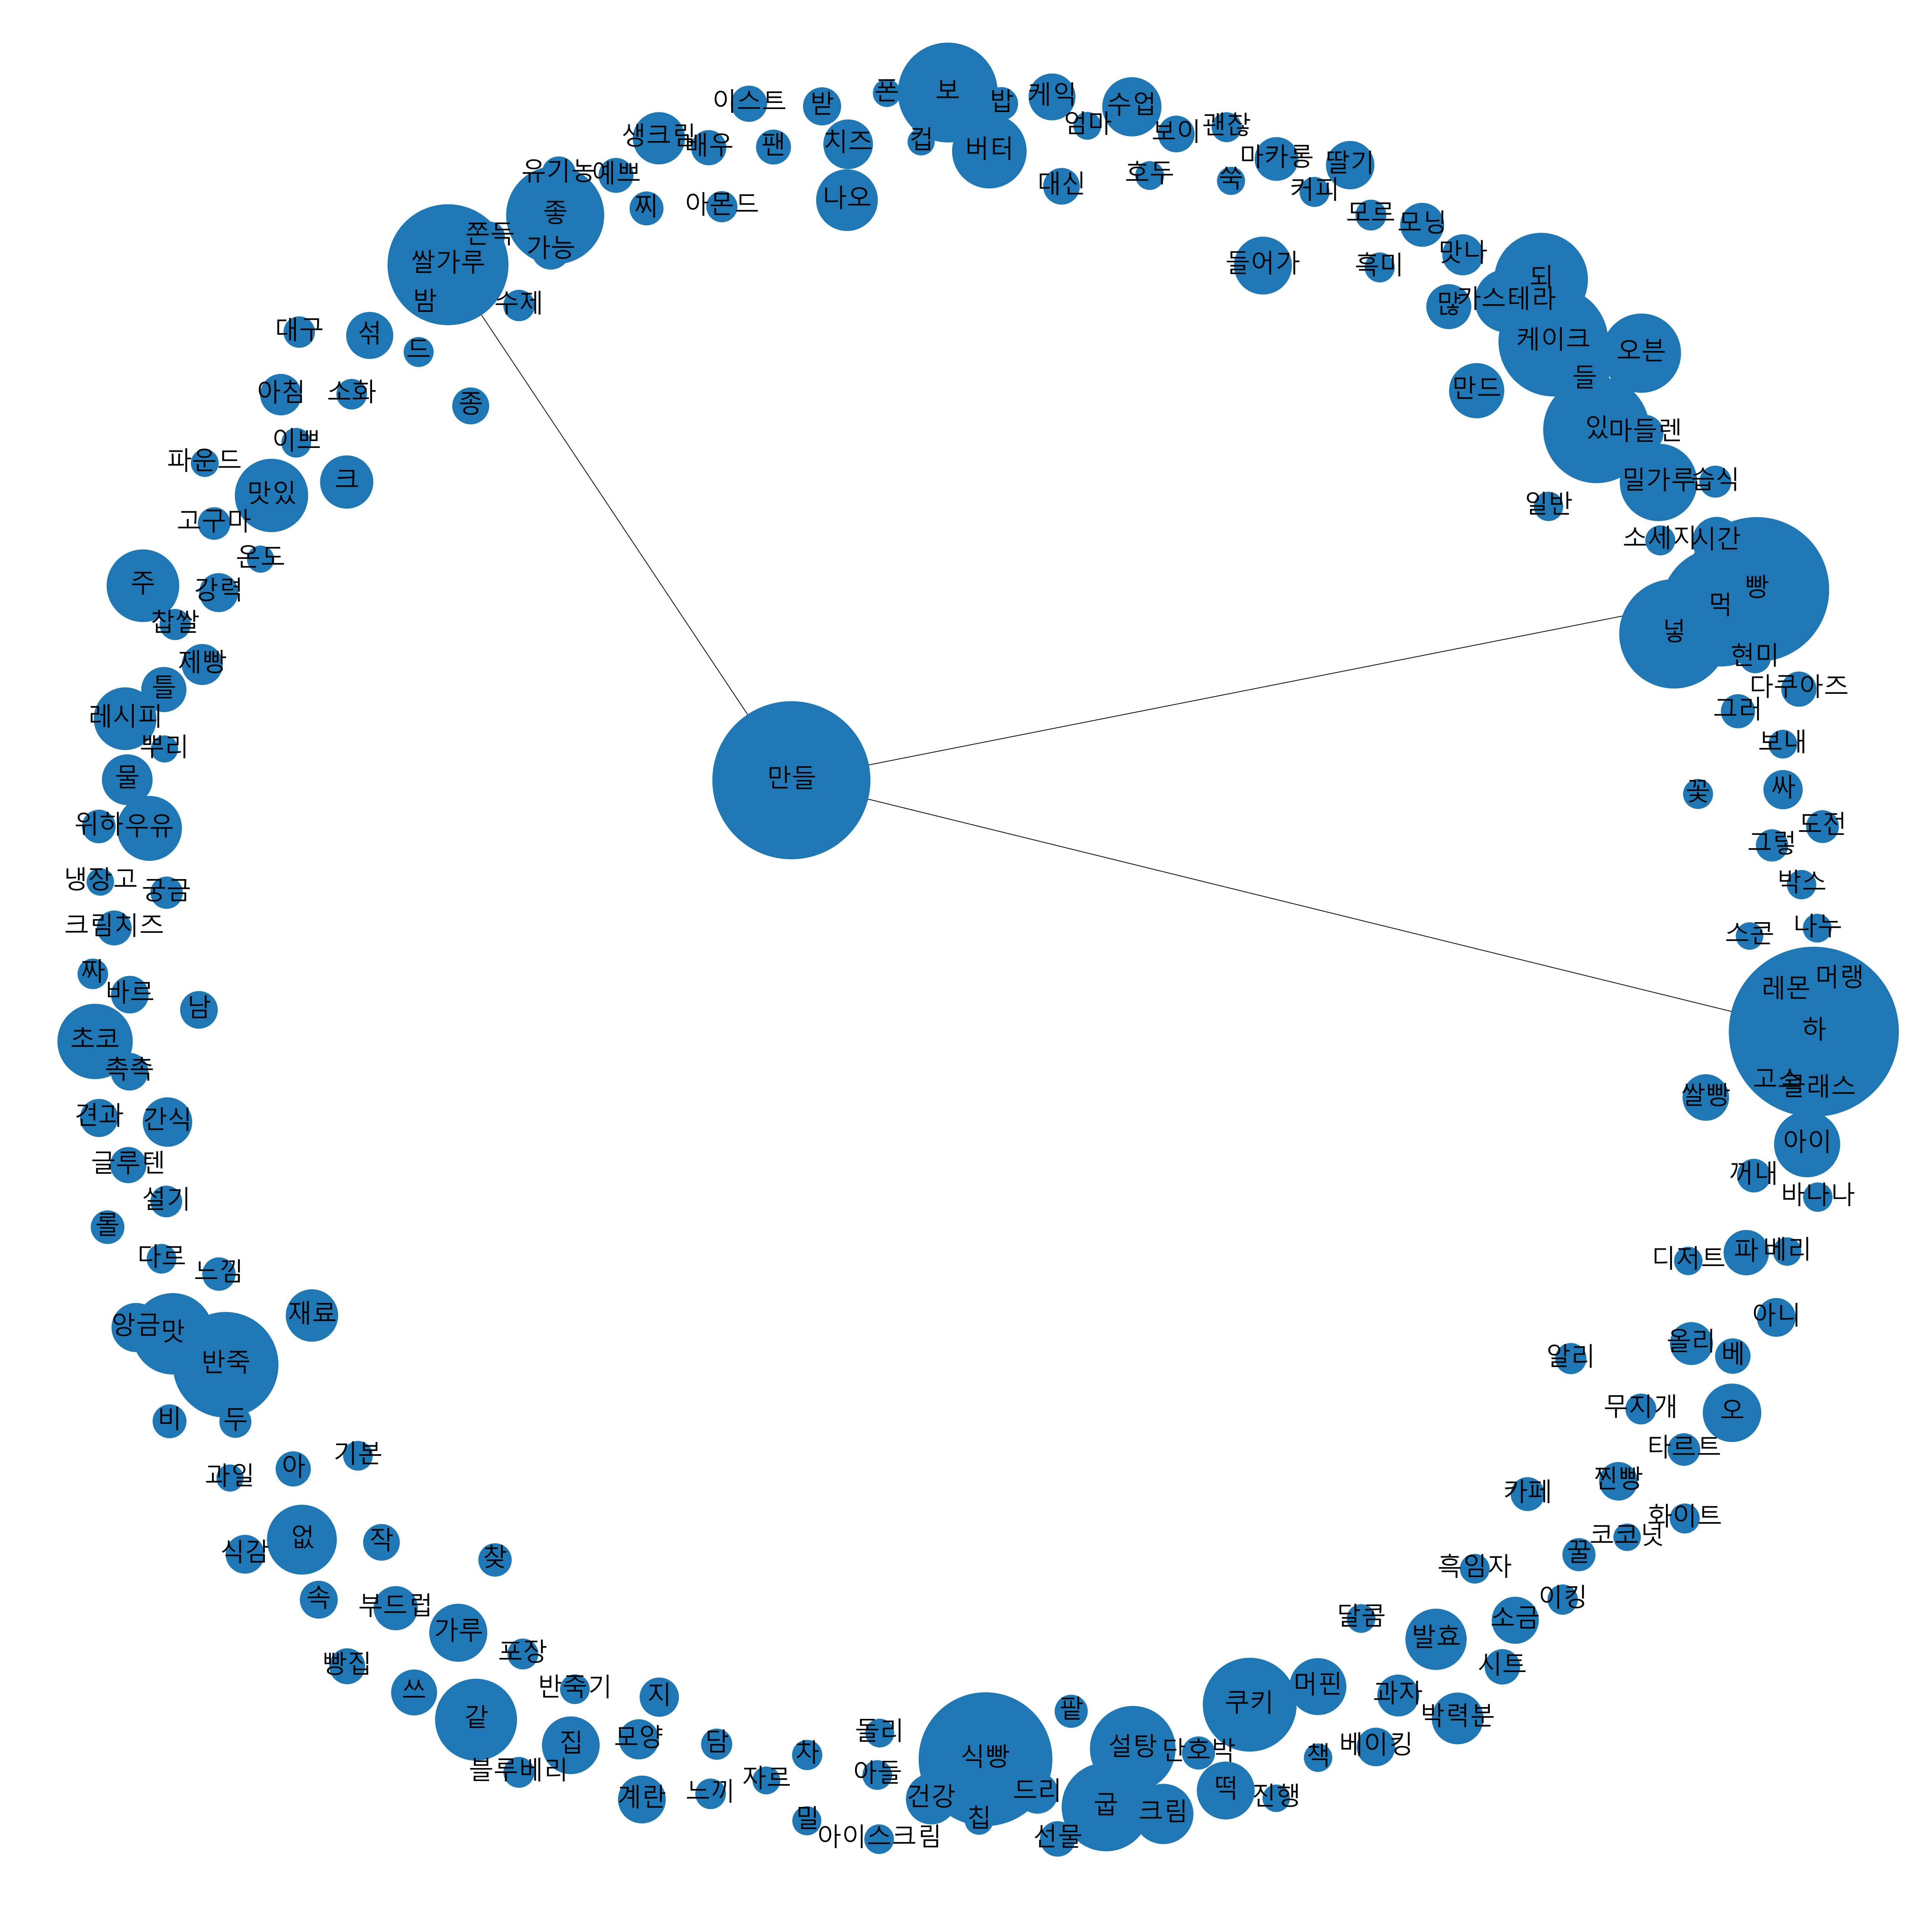

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(35,35))

# networkx Í∑∏ÎûòÌîÑ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
G = nx.Graph()

# node_dfÏùò ÌÇ§ÏõåÎìú ÎπàÎèÑÏàòÎ•º Îç∞Ïù¥ÌÑ∞Î°ú ÌïòÏó¨, ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑÏùò ‚ÄòÎÖ∏Îìú‚Äô Ïó≠Ìï†ÏùÑ ÌïòÎäî ÏõêÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_dfÏùò Ïó∞Í¥Ä Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú, ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑÏùò ‚ÄòÍ¥ÄÍ≥Ñ‚Äô Ïó≠Ìï†ÏùÑ ÌïòÎäî ÏÑ†ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])


# for node in G:
#     print(G.nodes[node])


# Í∑∏ÎûòÌîÑ ÎîîÏûêÏù∏Í≥º Í¥ÄÎ†®Îêú ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*30 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

font_path = "data/Pretendard-Black.otf"
fname = fm.FontProperties(fname=font_path).get_name()

nx.draw_networkx_labels(G, pos=pos, font_family="Malgun Gothic", font_size=33)



# # Í∑∏ÎûòÌîÑÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
ax = plt.gca()
plt.show()